In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.5.2 installed at /Users/ikumakiyoshi/.julia/conda/3/lib/python3.10/site-packages/camb


In [3]:
nside = 2**8

In [4]:
#Set up a new set of parameters for CAMB
pars = camb.read_ini('params_camb_for_PTEP.ini')
#Set WantTensors to True
pars.WantTensors = True
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=1)
pars.set_for_lmax(3*nside + 1, lens_potential_accuracy=0)
random_seed = 5123
pars.RandomSeed = random_seed;

In [5]:
#calculate results for these parameters
results = camb.get_results(pars)

In [6]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, lmax = 3*nside + 1, CMB_unit='muK', raw_cl=True)
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [7]:
cl_scal = powers['unlensed_scalar']
cl_tens = powers['tensor']
cl_lens = powers['lensed_scalar']
cl_pot = powers['lens_potential']
cl_total = powers['total']

r = 10**-2

cl = cl_scal + r * cl_tens + cl_lens

In [8]:
import healpy as hp
map = hp.synfast(cl.T, nside, new = True)

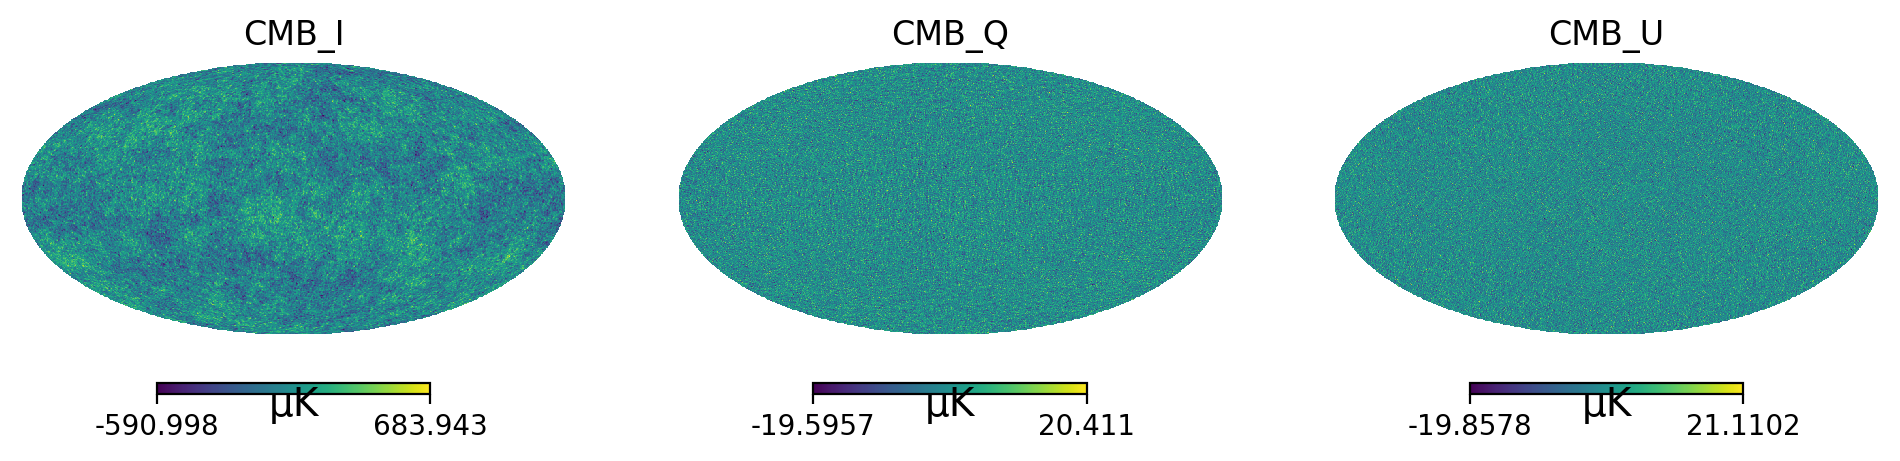

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(map[0], title="CMB I", hold=True, unit="μK",)
plt.axes(ax2)
hp.mollview(map[1], title="CMB Q", hold=True, unit="μK",)
plt.axes(ax3)
hp.mollview(map[2], title="CMB U", hold=True, unit="μK",)

In [10]:
smoothed_data = hp.smoothing(map[0], fwhm=1)

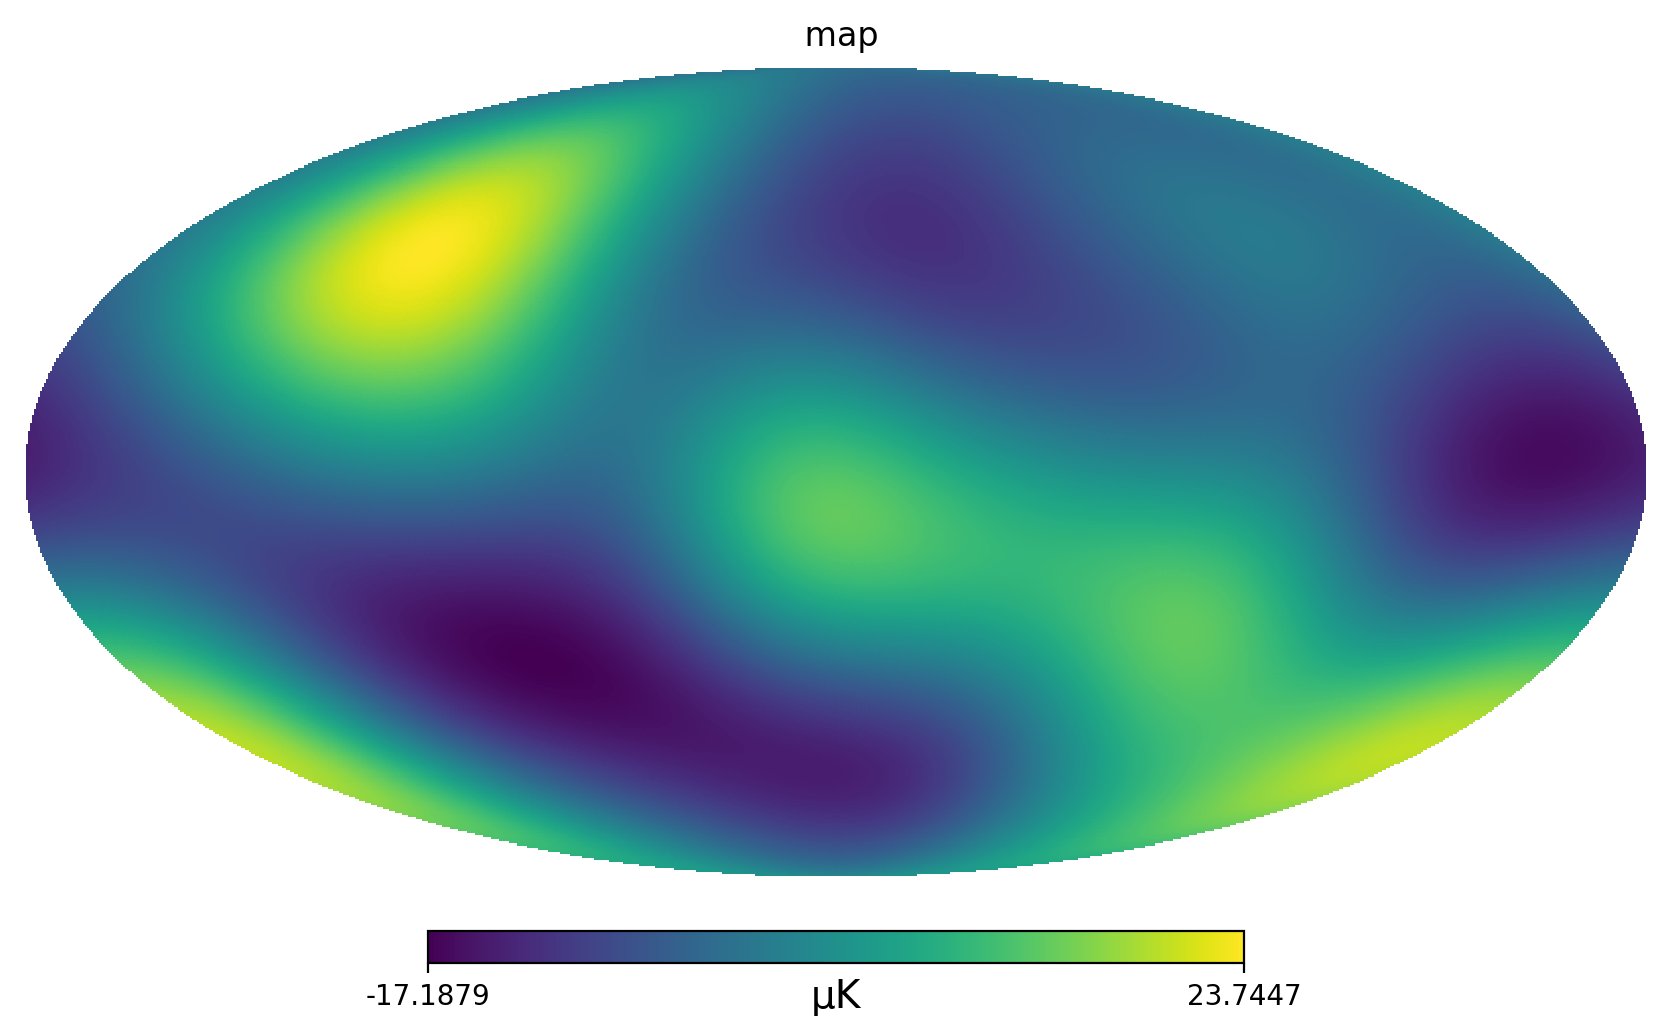

In [11]:
hp.mollview(smoothed_data, title=" map", unit = "μK")

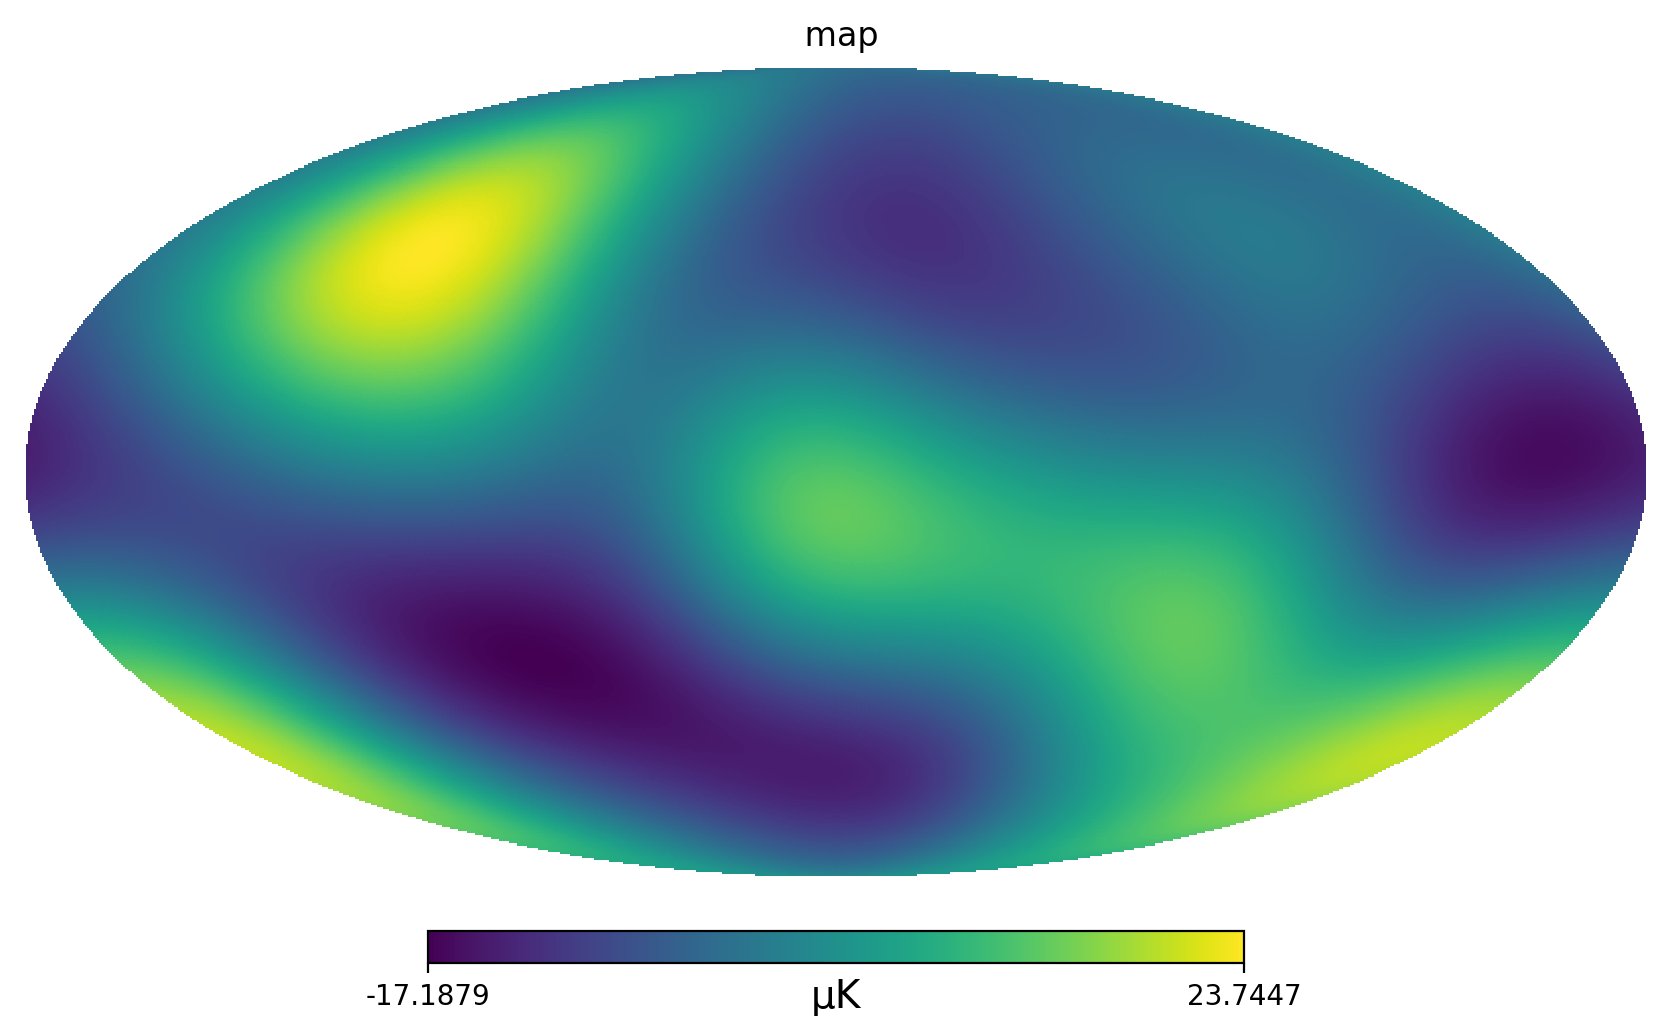

In [12]:
hp.mollview(smoothed_data, title=" map", unit = "μK")

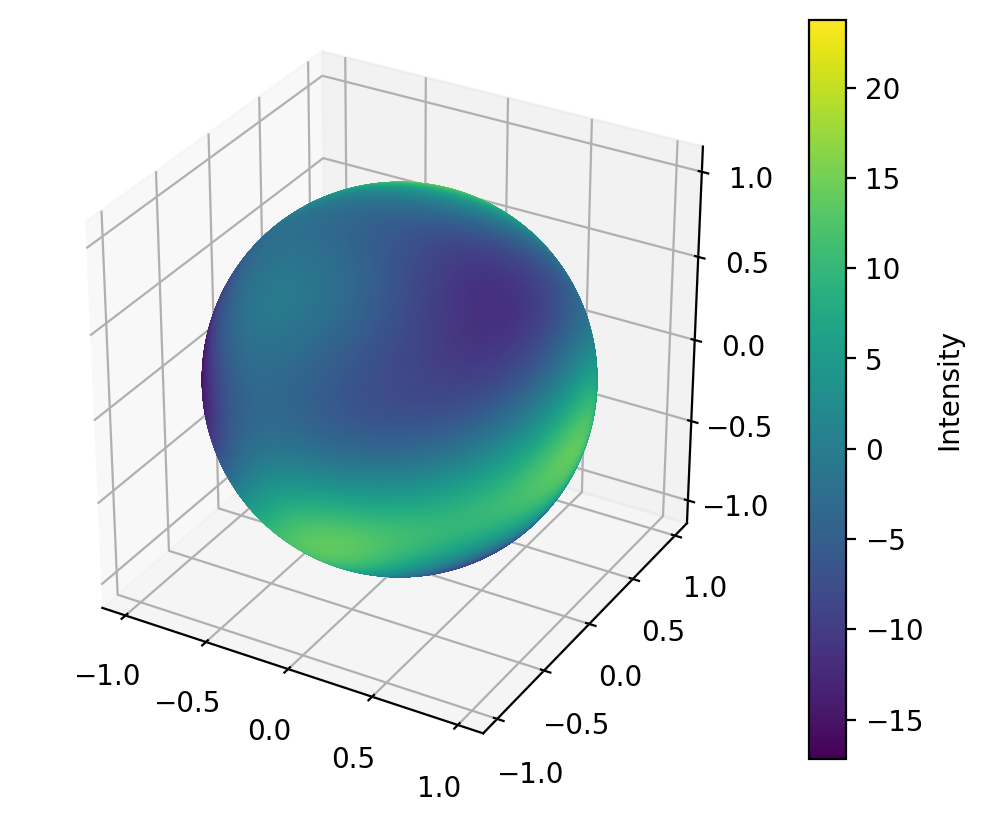

In [13]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the Healpix parameters (NSIDE)
nside = hp.get_nside(smoothed_data)

# Generate the spherical coordinates from the Healpix pixels
theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))

# Convert spherical coordinates to Cartesian coordinates
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data on the 3D sphere
sc = ax.scatter(x, y, z, c=smoothed_data, cmap='viridis', s=10)

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

# Add a colorbar
cb = fig.colorbar(sc, ax=ax)
cb.set_label('Intensity')

plt.show()